# Supervised Sequence Classification

While unsupervised methods can be powerful to identify antigen-specific sequences, being able to leverage known labels to guide the learning process can provide for better results, provided there is a sufficient amount of data to learn from. The first type of supervised learning we will explore within DeepTCR is being able to correctly classify a given TCR sequence to some label (i.e. its antigen specificity) from using its sequence information.

First we will load data from the Murine dataset which has TCR sequences from 9 murine antigens with beta-chain information including sequence, v-beta, and j-beta gene usage.

In [1]:
# import pandas as pd
# DF = pd.read_csv('Data/MOG/IED8_pos/Filtered_MOG_assays.csv')
# DF.head()
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('../')
from DeepTCR.DeepTCR import DeepTCR_SS

In [3]:
# Instantiate training object
DTCR_SS = DeepTCR_SS('MOG')

#Load Data from directories
DTCR_SS.Get_Data(directory='Data/MOG',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

Loading Data...
Embedding Sequences...
Data Loaded


We will then train the sequence classifier as follows. First, we will split the dataset into a train,validation,and independent test cohort so we can assess how generalizable our model will be to new unseen data.And then we will train our sequene classifier. Our test_size parameter will tell DeepTCR how much of the data to leave out for valid/test which is split evenly across these two.

In [4]:
DTCR_SS.Get_Train_Valid_Test(test_size=0.1)
DTCR_SS.Train(suppress_output=True)


Done Training
INFO:tensorflow:MOG/models/model_0/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


When we are done training, we can assess how well our classifier performs on the independent test set via looking at the ROC curves.

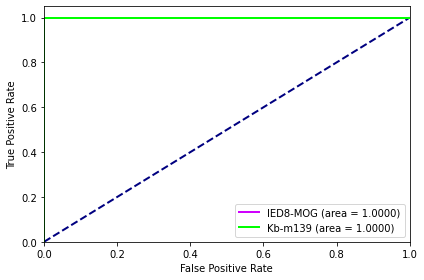

In [5]:
DTCR_SS.AUC_Curve()

We can also train our classifier with two other methods that allow for multiple iterations including a Monte Carlo method and K-Fold Cross-Validation Method.

For the Monte-Carlo method, we will specify the number of times we want to train train the classifier and the test size we want for each iteration. Of note, all parameters available for the Train method are also inputs for the Monte-Carlo and K-Fold Cross-Validation method.

In [6]:
DTCR_SS.Monte_Carlo_CrossVal(test_size=0.25,folds=4, suppress_output=True)

  0%|          | 0/4 [00:00<?, ?it/s]


Done Training
INFO:tensorflow:MOG/models/model_0/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


 25%|██▌       | 1/4 [00:01<00:03,  1.17s/it]



Done Training
INFO:tensorflow:MOG/models/model_1/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


 50%|█████     | 2/4 [00:02<00:02,  1.12s/it]



Done Training
INFO:tensorflow:MOG/models/model_2/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


 75%|███████▌  | 3/4 [00:03<00:01,  1.13s/it]



Done Training
INFO:tensorflow:MOG/models/model_3/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Monte Carlo Simulation Completed


Once again, we can view the AUC curve.

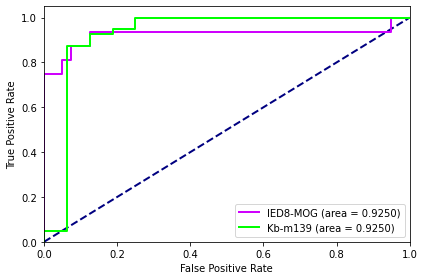

In [7]:
DTCR_SS.AUC_Curve()

To run a K-fold cross validation with 5 folds of the data, fun the following command. In this case, no test_size is required as the algorithm is trained on the entirety of the train folds and tested on the out-fold.

In [8]:
DTCR_SS.K_Fold_CrossVal(folds=4, suppress_output=True)


Done Training
INFO:tensorflow:MOG/models/model_0/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


Done Training
INFO:tensorflow:MOG/models/model_1/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


Done Training
INFO:tensorflow:MOG/models/model_2/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


Done Training
INFO:tensorflow:MOG/models/model_3/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.

K-fold Cross Validation Completed


Once our algorithm has been trained, we may want to see which sequences are the most strongly predicted for each label. To do this we will run the following command. The output of the command is a dictionary of dataframes within the object we can view. Additionally, these dataframes can be found in the results folder underneath the subdirectory 'Rep_Sequences'.

In [9]:
DTCR_SS.Representative_Sequences()

In [10]:
print(DTCR_SS.Rep_Seq['IED8-MOG'])

   alpha        beta v_alpha j_alpha    v_beta d_beta   j_beta     Class  \
8   None  GETGGLYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
6   None  GETGNNYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
3   None  GGGRGLYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
9   None  GETGGAYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
17  None  GDAGGGDAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
7   None  GETGGVYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
15  None  GDAGVNYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
14  None  GDEAGGYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
16  None  GDAGTPYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   
12  None  GDETGGYAEQ    None    None  TRBV13-2   None  TRBJ2-1  IED8-MOG   

       Sample      Freq  Counts           HLA  IED8-MOG   Kb-m139  
8   train.tsv  0.038462       1  [N, o, n, e]  0.999507  0.000493  
6   train.tsv  0.038462    

Furthermore, we may want to know which learned motifs are associated with a given label. To do this, we can run the following command with the label we want to know the predictive motifs for.

In [11]:
DTCR_SS.Motif_Identification('IED8-MOG')

Motif Identification Completed


The motifs can then be found in fasta files in the results folder underneath (label)_(alpha/beta)_Motifs. These fasta fiels can then be used with "https://weblogo.berkeley.edu/logo.cgi" for motif visualization.The file names have the magnitude of the enrichment as the first number followed by '_feature_n'. The higher the number, the more enriched the motif is in the label-specific sequences.

## Visualization

We can also visualize the learned latent space from the supervised sequence classifier through plotting a UMAP representation of the sequences in two dimensions.

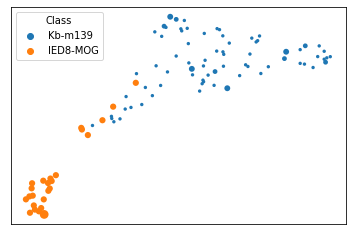

In [12]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=1000)

We can also specify whether we only want to plot sequences that were used in either train,valid, or the test set with the 'set' parameter.

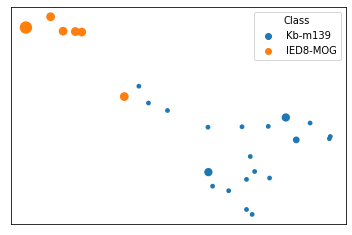

In [13]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=2000,set='test')

We can also visualize how the repertoires are related from this learned representation. This visualiztion is helpful when we want to compare how different TCR repertoires are related structurally.

In [14]:
# DTCR_SS.Repertoire_Dendrogram(gridsize=50,gaussian_sigma=0.75,lw=6,dendrogram_radius=0.3)

See documentation for how to use the full functionality of this method.

# test on new set

In [25]:
import numpy as np
import pandas as pd

test_DF = pd.read_csv('Data/test/test.tsv', sep='\t')
new_beta = test_DF.iloc[:,0]
new_vbeta = test_DF.iloc[:,2]
new_jbeta = test_DF.iloc[:,3]

# new_beta = np.array([...])
# new_vbeta = np.array([...])
# new_jbeta = ...

In [26]:
set(new_vbeta)

{'TRBV13-2', 'TRBV16', 'TRBV19', 'TRBV20', 'TRBV5'}

In [27]:
train_data = pd.read_csv('Data/MOG/IED8-MOG/train.tsv', sep='\t')
set(train_data['Chain 2 V Gene'])


{'TCRVB8-2', 'TRBV13-2', 'TRBV16', 'TRBV19', 'TRBV20', 'TRBV5'}

Returns:
            features, features_dist

            - features (array), shape = [N, latent_dim]: An array that contains n x latent_dim containing features for all sequences. For the VAE, this represents the features from the latent space. For the sequence classifier, this represents the probabilities for every class or the regressed value from the sequence regressor. In the case of multiple models being used for inference in ensemble, this becomes the average prediction over all models.

            - features_dist (array), shape = [n_models,N,latent_dim]: An array that contains the output of all models separately for each input sequence. This output is useful if using multiple models in ensemble to predict on a new sequence. This output describes the distribution of the predictions over all models.

In [28]:
predictions, dist = DTCR_SS.Sequence_Inference(
    beta_sequences=new_beta,
    v_beta=new_vbeta,
    j_beta=new_jbeta,
    batch_size=10,
    return_dist=True
)

INFO:tensorflow:Restoring parameters from MOG/models/model_2/model.ckpt
INFO:tensorflow:Restoring parameters from MOG/models/model_3/model.ckpt
INFO:tensorflow:Restoring parameters from MOG/models/model_1/model.ckpt
INFO:tensorflow:Restoring parameters from MOG/models/model_0/model.ckpt


In [34]:
prob_df = pd.DataFrame(predictions)
test_TCR = pd.concat([test_DF, prob_df], axis = 1)
test_TCR.head(5)

,VDJ_1_cdr3_aa,VDJ_1_consensus_count,VDJ_1_v_call,VDJ_1_j_call,cell_id,0,1
0,CASSIGAEDTQYF,0.080959,TRBV19,TRBJ2-5,AAACGGAGTAGTTATG-1_0516_CNS,0.010117,0.989883
1,CGARETTETLYF,0.211987,TRBV20,TRBJ2-3,AAACGGAGTCTACGGA-1_0516_CNS,0.404869,0.595131
2,CASSPDGYYAEQFF,0.146400,TRBV5,TRBJ2-1,AAACTTATCGTTGCAA-1_0516_CNS,0.025494,0.974506
3,CASSSGTGGHEQYF,0.144350,TRBV19,TRBJ2-7,AAAGCCGAGAGAGAGA-1_0516_CNS,0.020275,0.979725
4,CASSPQGGSAETLYF,0.360437,TRBV5,TRBJ2-3,AAAGCGCCAGTACGCC-1_0516_CNS,0.123232,0.876768


In [44]:
thres = 0.9
Class1_mask = test_TCR[0] > thres
Class1_mask.value_counts()

False    11073
True        27
Name: 0, dtype: int64

In [45]:
Class1_clonotypes = test_TCR.drop_duplicates(['VDJ_1_cdr3_aa'])
Class1_mask_2 = Class1_clonotypes[0] > thres
Class1_mask_2.value_counts()

False    7122
True       22
Name: 0, dtype: int64

In [46]:
test_TCR.to_csv('MOG_specifi_prob.csv', header = True, index =False)